In [0]:
spark

In [0]:
container_name = "mycontainer"
storage_account_name = "bhushanrkashyap"
# SAS token of the container
sas_token = "enterSasTokenHere"






In [0]:
spark.conf.set(
    "fs.azure.sas.mycontainer.bhushanrkashyap.blob.core.windows.net",
    "sp=rl&st=2025-07-01T16:30:15Z&se=2035-07-02T00:30:15Z&spr=https&sv=2024-11-04&sr=c&sig=98PQ6vTNP9NJ5aMt8UX4F%2F3mYrYRKaLyUz1NkIF2vTw%3D"
)


In [0]:
from pyspark.sql.types import StructField , StructType , IntegerType , StringType , DateType , DecimalType , NumericType , DoubleType , FloatType 
from pyspark.sql import Row
from pyspark.sql.functions import avg, sum , when , col
from pyspark.sql.window import Window

In [0]:
#Designing schema for ball_by_ball_df
ball_by_ball_schema = StructType([
    StructField("MatcH_id", IntegerType(), True),
    StructField("Over_id", IntegerType(), True),
    StructField("Ball_id", IntegerType(), True),
    StructField("Innings_No", IntegerType(), True),
    StructField("Team_Batting", StringType(), True),
    StructField("Team_Bowling", StringType(), True),
    StructField("Striker_Batting_Position", DoubleType(), True), 
    StructField("Extra_Type", StringType(), True),
    StructField("Runs_Scored", IntegerType(), True),
    StructField("Extra_runs", IntegerType(), True),
    StructField("Wides", IntegerType(), True),
    StructField("Legbyes", IntegerType(), True),
    StructField("Byes", IntegerType(), True),
    StructField("Noballs", IntegerType(), True),
    StructField("Penalty", IntegerType(), True),
    StructField("Bowler_Extras", IntegerType(), True),
    StructField("Out_type", StringType(), True),
    StructField("Caught", IntegerType(), True),
    StructField("Bowled", IntegerType(), True),
    StructField("Run_out", IntegerType(), True),
    StructField("LBW", IntegerType(), True),
    StructField("Retired_hurt", IntegerType(), True),
    StructField("Stumped", IntegerType(), True),
    StructField("caught_and_bowled", IntegerType(), True),
    StructField("hit_wicket", IntegerType(), True),
    StructField("ObstructingFeild", IntegerType(), True),
    StructField("Bowler_Wicket", IntegerType(), True),
    StructField("Match_Date", StringType(), True), 
    StructField("Season", IntegerType(), True),
    StructField("Striker", IntegerType(), True),
    StructField("Non_Striker", IntegerType(), True),
    StructField("Bowler", IntegerType(), True),
    StructField("Player_Out", DoubleType(), True), # Can be null
    StructField("Fielders", DoubleType(), True), # Can be null
    StructField("Striker_match_SK", IntegerType(), True),
    StructField("StrikerSK", IntegerType(), True),
    StructField("NonStriker_match_SK", IntegerType(), True),
    StructField("NONStriker_SK", IntegerType(), True),
    StructField("Fielder_match_SK", IntegerType(), True),
    StructField("Fielder_SK", IntegerType(), True),
    StructField("Bowler_match_SK", IntegerType(), True),
    StructField("BOWLER_SK", IntegerType(), True),
    StructField("PlayerOut_match_SK", IntegerType(), True),
    StructField("BattingTeam_SK", IntegerType(), True),
    StructField("BowlingTeam_SK", IntegerType(), True),
    StructField("Keeper_Catch", IntegerType(), True),
    StructField("Player_out_sk", IntegerType(), True),
    StructField("MatchDateSK", IntegerType(), True)
])

In [0]:
#Read the dataset from existing Blob.
ball_by_ball_df = spark.read.format("csv").option("header", "true").schema(ball_by_ball_schema).load("wasbs://mycontainer@bhushanrkashyap.blob.core.windows.net/Ball_By_Ball.csv")

In [0]:
#Designing schema for match_df
match_schema = StructType([
    StructField("Match_SK", IntegerType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("Team1", StringType(), True),
    StructField("Team2", StringType(), True),
    StructField("match_date", StringType(), True),
    StructField("Season_Year", IntegerType(), True),
    StructField("Venue_Name", StringType(), True),
    StructField("City_Name", StringType(), True),
    StructField("Country_Name", StringType(), True),
    StructField("Toss_Winner", StringType(), True),
    StructField("match_winner", StringType(), True),
    StructField("Toss_Name", StringType(), True),
    StructField("Win_Type", StringType(), True),
    StructField("Outcome_Type", StringType(), True),
    StructField("ManOfMach", StringType(), True),
    StructField("Win_Margin", DoubleType(), True), # Can be null
    StructField("Country_id", IntegerType(), True)
])

In [0]:
#Read the dataset from existing Blob
match_df = spark.read.format("csv").option("header" , "True").schema(match_schema).load("wasbs://mycontainer@bhushanrkashyap.blob.core.windows.net/Match.csv")

In [0]:
#Design schema for Player_match csv
player_match_schema = StructType([
    StructField("Player_match_SK", IntegerType(), True),
    StructField("PlayerMatch_key", DoubleType(), True), # Can be null
    StructField("Match_Id", IntegerType(), True),
    StructField("Player_Id", IntegerType(), True),
    StructField("Player_Name", StringType(), True),
    StructField("DOB", StringType(), True), # Can be converted to DateType after reading if needed.
    StructField("Batting_hand", StringType(), True),
    StructField("Bowling_skill", StringType(), True), # Can be null
    StructField("Country_Name", StringType(), True),
    StructField("Role_Desc", StringType(), True),
    StructField("Player_team", StringType(), True),
    StructField("Opposit_Team", StringType(), True),
    StructField("Season_year", DoubleType(), True), # Can be null
    StructField("is_manofThematch", DoubleType(), True), # Can be null
    StructField("Age_As_on_match", DoubleType(), True), # Can be null
    StructField("IsPlayers_Team_won", DoubleType(), True), # Can be null
    StructField("Batting_Status", DoubleType(), True), # All null
    StructField("Bowling_Status", DoubleType(), True), # All null
    StructField("Player_Captain", StringType(), True),
    StructField("Opposit_captain", StringType(), True),
    StructField("Player_keeper", StringType(), True),
    StructField("Opposit_keeper", StringType(), True)
])

In [0]:
player_match_df = spark.read.format("csv").option("header", "true").schema(player_match_schema).load("wasbs://mycontainer@bhushanrkashyap.blob.core.windows.net/Player_match.csv")

In [0]:
#Design schema for Player.csv
player_schema = StructType([
    StructField("PLAYER_SK", IntegerType(), True),
    StructField("Player_Id", IntegerType(), True),
    StructField("Player_Name", StringType(), True),
    StructField("DOB", StringType(), True), # Can be converted to DateType after reading if needed.
    StructField("Batting_hand", StringType(), True),
    StructField("Bowling_skill", StringType(), True), # Can be null
    StructField("Country_Name", StringType(), True)
])

In [0]:
#Read the dataset from existing Blob
player_df = spark.read.format("csv").option("header" , "True").schema(player_schema).load("wasbs://mycontainer@bhushanrkashyap.blob.core.windows.net/Player.csv")

In [0]:
#Design schema for Team.csv
team_schema = StructType([
    StructField("Team_SK", IntegerType(), True),
    StructField("Team_Id", IntegerType(), True),
    StructField("Team_Name", StringType(), True)
])

In [0]:
#Read team_df
team_df = spark.read.format("csv").option("header" , "true").schema(team_schema).load("wasbs://mycontainer@bhushanrkashyap.blob.core.windows.net/Team.csv")

In [0]:
# filter to include only valid deliveries
ball_by_ball_df = ball_by_ball_df.filter((col("wides") == 0) & (col("noballs") == 0))
#average and total runs scored
total_and_avg_runs = ball_by_ball_df.groupBy("MatcH_id" , "innings_no").agg(sum("runs_scored").alias("total_runs"),
avg("runs_scored").alias("avg_runs"))


In [0]:
# Use of Window function to calculate runs scored by running between the wickets.
window1 = Window.partitionBy("MatcH_id", "innings_no").orderBy("over_id")

ball_by_ball_df = ball_by_ball_df.withColumn('running_total_runs', sum("runs_scored").over(window1))



In [0]:
#Filter out the high impact balls i.e balls with more than  6 runs or a wicket
ball_by_ball_df = ball_by_ball_df.withColumn("high_impact_balls",
    when((col("runs_scored") >= 6) | (col("bowler_wicket") == True), True).otherwise(False))

In [0]:
window2 = Window.partitionBy("MatcH_id" , "innings_no" ,"Over_id").orderBy("over_id")


In [0]:
#calculate runs scored on each ball
ball_by_ball_df = ball_by_ball_df.withColumn("Total_runs_on_a_ball", col("Runs_Scored") + col("Extra_runs"))



In [0]:
window2 = Window.partitionBy("MatcH_id", "Innings_no").orderBy("Over_id", "Ball_id")

In [0]:
#calculate Innings total
ball_by_ball_df = ball_by_ball_df.withColumn("Innings_Total", sum("Total_runs_on_a_ball").over(window2))

In [0]:
from pyspark.sql.functions import year , month , when , dayofmonth
#categorize the match_date column into date , month , year
match_df = match_df.withColumn("Year", year("match_date"))
match_df = match_df.withColumn("Month", month("match_date"))
match_df = match_df.withColumn("Day", dayofmonth("match_date"))


In [0]:
#Categorize Win_margin as High , Medium , Low
match_df = match_df.withColumn("Win_margin", 
    when (col("Win_margin")>= 100, "High")
    .when((col("Win_margin")>=50) & (col("Win_margin")<100),"Medium").otherwise("Low")
)

In [0]:
#Analyze the impact of toss
match_df = match_df.withColumn("toss_and_match_winner", 
    when(col("Toss_Winner") == col("match_winner"),"Yes").otherwise("No"))

In [0]:
from pyspark.sql.functions import lower, regexp_replace
#clean the player names
player_df = player_df.withColumn("Player_Name", lower(regexp_replace(col("Player_Name"), r"[^a-zA-Z0-9]", "")))

In [0]:
#Handling missing values
player_df = player_df.na.fill({"Batting_hand" : "unknown" , 
                               "Bowling_skill" : "unknown"})

In [0]:
player_df = player_df.withColumn("Batting_style",
when(col("Batting_hand").contains("left"),"Left-Handed").otherwise("Right-Handed"))

In [0]:
player_df.show(3)

+---------+---------+-----------+----------+--------------+----------------+------------+-------------+
|PLAYER_SK|Player_Id|Player_Name|       DOB|  Batting_hand|   Bowling_skill|Country_Name|Batting_style|
+---------+---------+-----------+----------+--------------+----------------+------------+-------------+
|        0|        1|  scganguly|  7/8/1972| Left-hand bat|Right-arm medium|       India| Right-Handed|
|        1|        2| bbmccullum| 9/27/1981|Right-hand bat|Right-arm medium| New Zealand| Right-Handed|
|        2|        3|  rtponting|12/19/1974|Right-hand bat|Right-arm medium|   Australia| Right-Handed|
+---------+---------+-----------+----------+--------------+----------------+------------+-------------+
only showing top 3 rows



In [0]:
player_df.printSchema()

root
 |-- PLAYER_SK: integer (nullable = true)
 |-- Player_Id: integer (nullable = true)
 |-- Player_Name: string (nullable = true)
 |-- DOB: string (nullable = true)
 |-- Batting_hand: string (nullable = false)
 |-- Bowling_skill: string (nullable = false)
 |-- Country_Name: string (nullable = true)
 |-- Batting_style: string (nullable = false)



In [0]:
player_df.drop("Bowling_arm")

DataFrame[PLAYER_SK: int, Player_Id: int, Player_Name: string, DOB: string, Batting_hand: string, Bowling_skill: string, Country_Name: string, Batting_style: string]

In [0]:
#Classify players based opn their bolwing-variations
player_df = player_df.withColumn(
    "Bowling_variations",
    when(col("Bowling_skill").contains("fast-medium"), "Fast-medium")
    .when(col("Bowling_skill").contains("fast"), "Fast")             
    .when(col("Bowling_skill").contains("medium"), "Medium")        
    .when(col("Bowling_skill").contains("offbreak"), "Offbreak")    
    .when(col("Bowling_skill").contains("legbreak"), "Legbreak")    
    .when(col("Bowling_skill").contains("orthodox"), "Orthodox")   
    .when(col("Bowling_skill").contains("googly"), "Googly")         
    .when(col("Bowling_skill").contains("chinaman"), "Chinaman")     
    .otherwise("Unknown")  
)

In [0]:
player_df.show (1)
    

+---------+---------+-----------+--------+-------------+----------------+------------+-------------+------------------+
|PLAYER_SK|Player_Id|Player_Name|     DOB| Batting_hand|   Bowling_skill|Country_Name|Batting_style|Bowling_variations|
+---------+---------+-----------+--------+-------------+----------------+------------+-------------+------------------+
|        0|        1|  scganguly|7/8/1972|Left-hand bat|Right-arm medium|       India| Right-Handed|            Medium|
+---------+---------+-----------+--------+-------------+----------------+------------+-------------+------------------+
only showing top 1 row



In [0]:
#Classify players based on their age.
player_match_df = player_match_df.withColumn("veteran", when(col("Age_As_on_match")>=35 , "Veteran").otherwise("Non-Veteran"))

In [0]:
#calculate No of years played
from pyspark.sql.functions import col , current_date , expr
player_match_df = player_match_df.withColumn("Years in the IPL", 
(year(current_date()) - (col("Season_year"))))

In [0]:

ball_by_ball_df.createOrReplaceTempView("ball_by_ball")
player_df.createOrReplaceTempView("player")
player_match_df.createOrReplaceTempView("player_match")
match_df.createOrReplaceTempView("match")     
team_df.createOrReplaceTempView("team")

In [0]:
top_scorers_peryear = spark.sql("""
    SELECT
        p.player_name,
        m.season_year,
        SUM(b.runs_scored) AS total_runs
    FROM
        ball_by_ball b
    JOIN
        match AS m ON b.match_id = m.match_id
    JOIN
        player AS p ON b.striker = p.player_id
    GROUP BY
        p.player_name,
        m.season_year
    ORDER BY
        m.season_year,
        total_runs DESC
""")
display(top_scorers_peryear)

player_name,season_year,total_runs
semarsh,2008,614
ggambhir,2008,532
stjayasuriya,2008,508
srwatson,2008,463
gcsmith,2008,437
acgilchrist,2008,431
ykpathan,2008,430
skraina,2008,420
msdhoni,2008,414
vsehwag,2008,399


In [0]:
top_scorers_peryear.show(30)

+-------------+-----------+----------+
|  player_name|season_year|total_runs|
+-------------+-----------+----------+
|      semarsh|       2008|       614|
|     ggambhir|       2008|       532|
| stjayasuriya|       2008|       508|
|     srwatson|       2008|       463|
|      gcsmith|       2008|       437|
|  acgilchrist|       2008|       431|
|     ykpathan|       2008|       430|
|      skraina|       2008|       420|
|      msdhoni|       2008|       414|
|      vsehwag|       2008|       399|
|     rgsharma|       2008|       399|
|      rdravid|       2008|       370|
|    scganguly|       2008|       349|
|      sdhawan|       2008|       340|
| kcsangakkara|       2008|       319|
|     djhussey|       2008|       318|
|    rvuthappa|       2008|       316|
|   saasnodkar|       2008|       311|
|  yuvrajsingh|       2008|       299|
|      papatel|       2008|       297|
|yvenugopalrao|       2008|       283|
|     jamorkel|       2008|       235|
|    mvboucher|       200

In [0]:
economical_bowlers_powerplay = spark.sql("""
SELECT 
p.player_name, 
AVG(b.runs_scored) AS avg_runs_per_ball, 
COUNT(b.bowler_wicket) AS total_wickets
FROM ball_by_ball b
JOIN player_match pm ON b.match_id = pm.match_id AND b.bowler = pm.player_id
JOIN player p ON pm.player_id = p.player_id
WHERE b.over_id <= 6
GROUP BY p.player_name
HAVING COUNT(*) >= 1
ORDER BY avg_runs_per_ball, total_wickets DESC
""")
economical_bowlers_powerplay.show(5)

+-----------+------------------+-------------+
|player_name| avg_runs_per_ball|total_wickets|
+-----------+------------------+-------------+
|  smharwood|0.3333333333333333|           18|
|  aveshkhan|               0.5|           12|
|   grnapier|               0.5|            6|
|  ankitsoni|               0.5|            6|
|     azampa|               0.5|            6|
+-----------+------------------+-------------+
only showing top 5 rows



In [0]:
toss_impact = spark.sql("""
SELECT m.match_id, m.toss_winner, m.toss_name, m.match_winner,
       CASE WHEN m.toss_winner = m.match_winner THEN 'Won' ELSE 'Lost' END AS match_outcome
FROM match m
WHERE m.toss_name IS NOT NULL
ORDER BY m.match_id
""")
toss_impact.show(5)

+--------+--------------------+---------+--------------------+-------------+
|match_id|         toss_winner|toss_name|        match_winner|match_outcome|
+--------+--------------------+---------+--------------------+-------------+
|  335987|Royal Challengers...|    field|Kolkata Knight Ri...|         Lost|
|  335988| Chennai Super Kings|      bat| Chennai Super Kings|          Won|
|  335989|    Rajasthan Royals|      bat|    Delhi Daredevils|         Lost|
|  335990|      Mumbai Indians|      bat|Royal Challengers...|         Lost|
|  335991|     Deccan Chargers|      bat|Kolkata Knight Ri...|         Lost|
+--------+--------------------+---------+--------------------+-------------+
only showing top 5 rows



In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

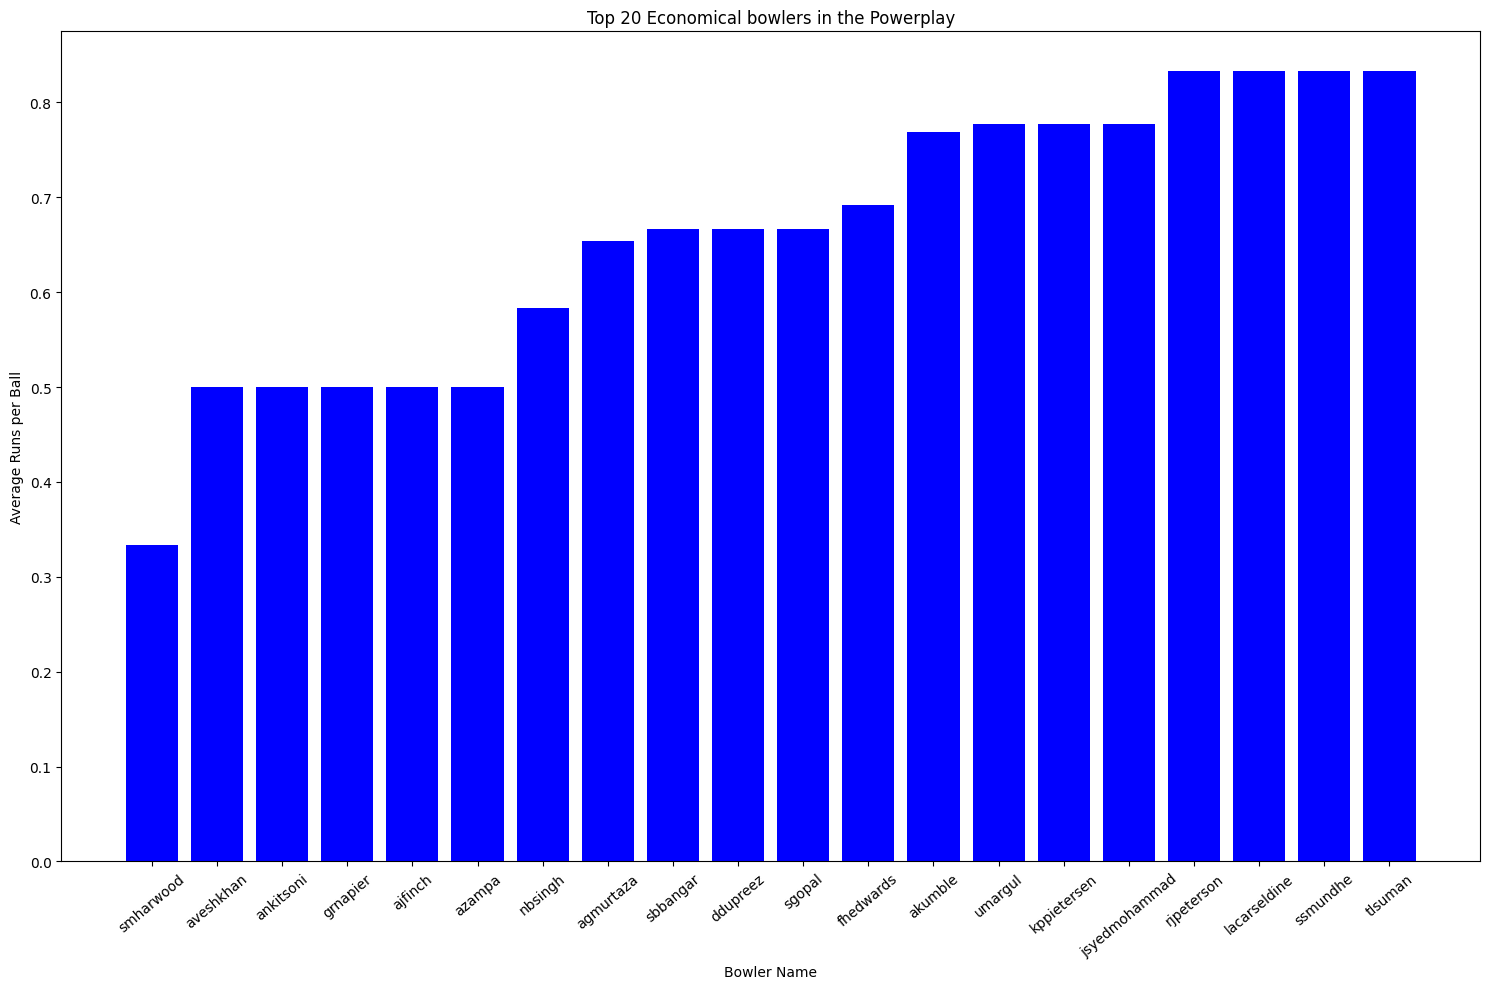

In [0]:
#Convert spark dataframe to pandas for matplotlib
economical_bowlers_pd = economical_bowlers_powerplay.toPandas()
plt.figure(figsize=(15,10))
top_bowlers = economical_bowlers_pd.nsmallest(20,'avg_runs_per_ball')
plt.bar(top_bowlers['player_name'],top_bowlers['avg_runs_per_ball'],color = "blue")
plt.xticks(rotation=40)
plt.xlabel("Bowler Name")
plt.ylabel("Average Runs per Ball")
plt.title("Top 20 Economical bowlers in the Powerplay")
plt.tight_layout()
plt.show()

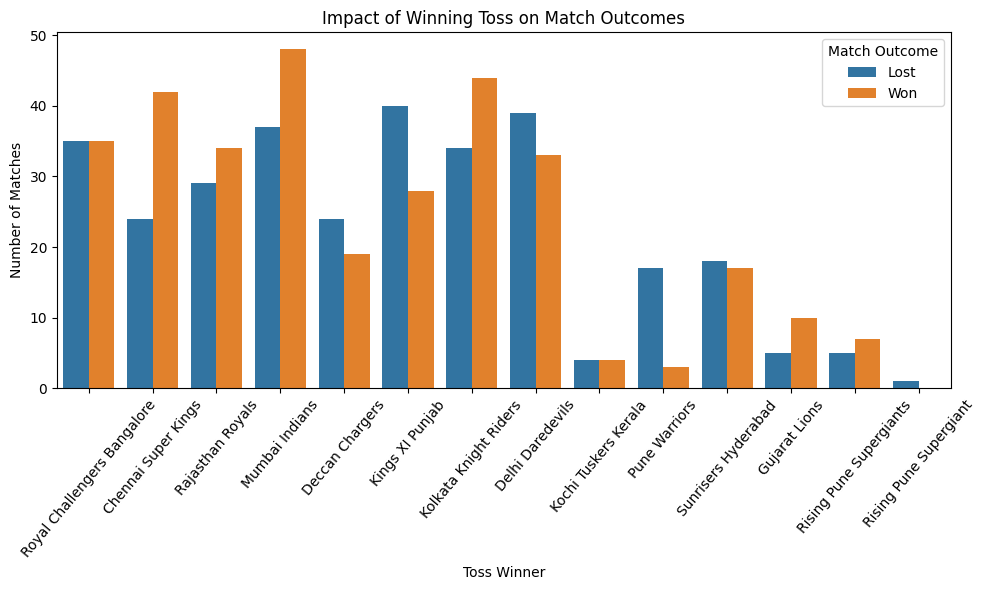

In [0]:
#toss impact visualization
toss_impact_id = toss_impact.toPandas()
plt.figure(figsize=(10, 6))
sns.countplot(x='toss_winner', hue ='match_outcome', data=toss_impact_id)
plt.title('Impact of Winning Toss on Match Outcomes')
plt.xlabel('Toss Winner')
plt.ylabel('Number of Matches')
plt.legend(title='Match Outcome')
plt.xticks(rotation=50)
plt.tight_layout()
plt.show()



In [0]:
scores_by_venue = spark.sql("""
SELECT venue_name, AVG(total_runs) AS average_score, MAX(total_runs) AS highest_score
FROM (
    SELECT ball_by_ball.match_id, match.venue_name, SUM(runs_scored) AS total_runs
    FROM ball_by_ball
    JOIN match ON ball_by_ball.match_id = match.match_id
    GROUP BY ball_by_ball.match_id, match.venue_name
)
GROUP BY venue_name
ORDER BY average_score DESC
""")


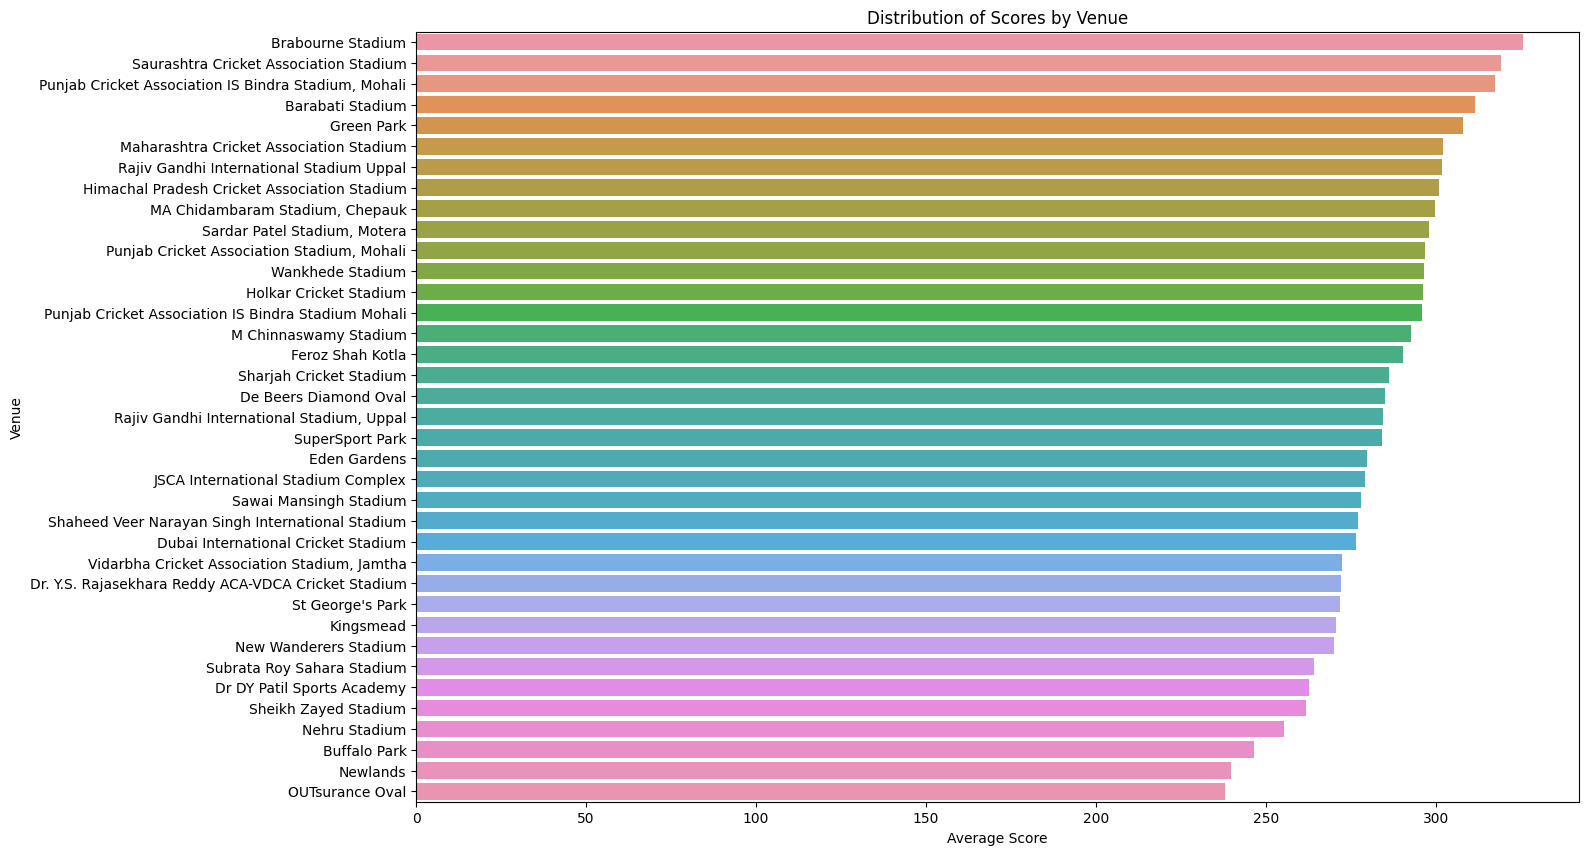

In [0]:
scores_pd = scores_by_venue.toPandas()
plt.figure(figsize=(15, 10))
sns.barplot(x='average_score', y='venue_name', data=scores_pd)
plt.title('Distribution of Scores by Venue')
plt.xlabel('Average Score')
plt.ylabel('Venue')
plt.show()


In [0]:
dismissal_types = spark.sql("""
SELECT out_type, COUNT(*) AS frequency
FROM ball_by_ball
WHERE out_type IS NOT NULL
GROUP BY out_type
ORDER BY frequency DESC
""")


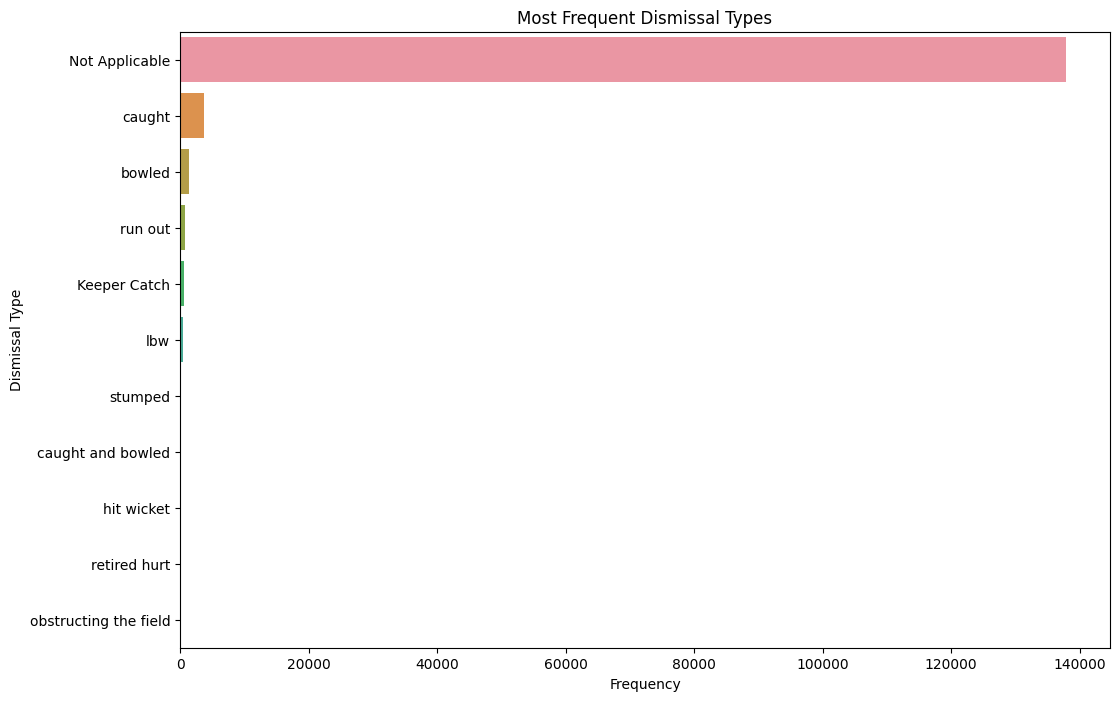

In [0]:
dismissal_pd = dismissal_types.toPandas()
plt.figure(figsize = (12,8))
sns.barplot(x = 'frequency',y = 'out_type',data = dismissal_pd)
plt.title('Most Frequent Dismissal Types')
plt.xlabel('Frequency')
plt.ylabel('Dismissal Type')
plt.show()

In [0]:
team_toss_win_performance = spark.sql("""
SELECT team1, COUNT(*) AS matches_played, SUM(
    CASE WHEN toss_winner = match_winner THEN 1 ELSE 0 END
    ) AS wins_after_toss
FROM match
WHERE toss_winner = team1
GROUP BY team1
ORDER BY wins_after_toss DESC
""")


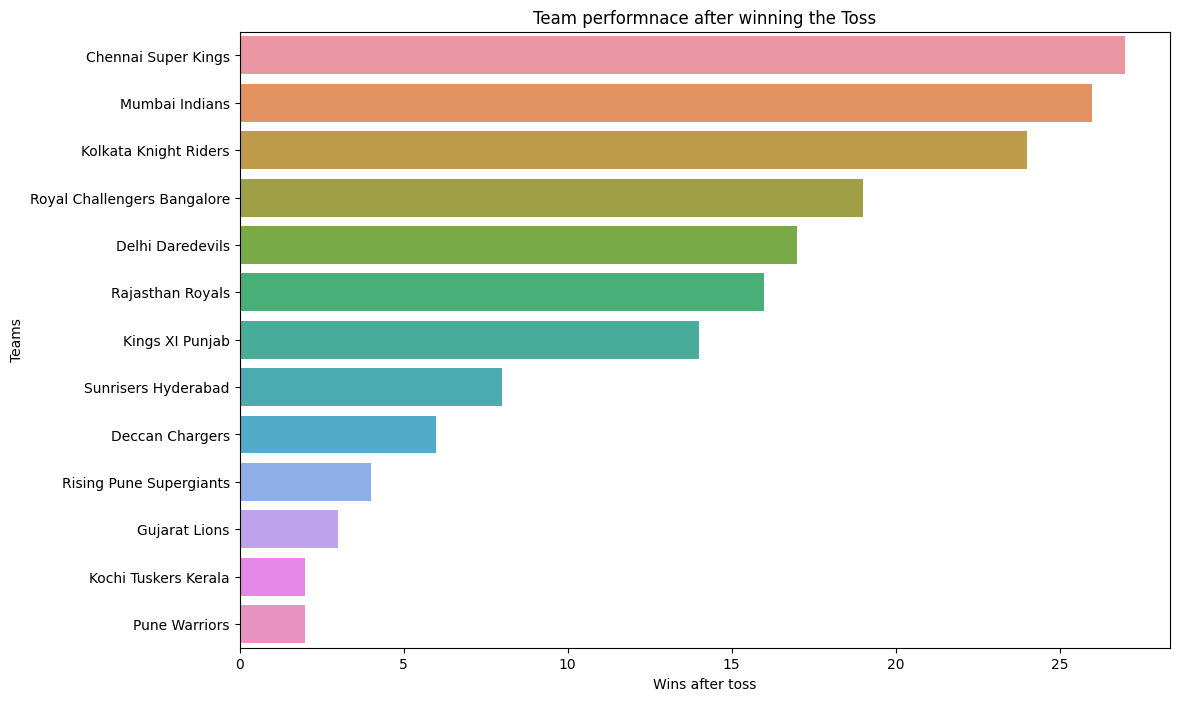

In [0]:
team_pd = team_toss_win_performance.toPandas()
plt.figure(figsize = (12,8))
sns.barplot(x = 'wins_after_toss' , y = 'team1', data = team_pd)
plt.title('Team performnace after winning the Toss')
plt.xlabel('Wins after toss')
plt.ylabel('Teams')
plt.show()

In [0]:
%pip install azure-cosmos

Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [0]:
%restart_python

In [0]:
#Upload the transformed dataframes to Azure Cosmos DB
from azure.cosmos import CosmosClient
from pyspark.sql.functions import col
from pyspark.sql.types import TimestampType, DecimalType, ArrayType, StructType
import uuid

# Cosmos DB connection details
cosmos_endpoint = "https://outputdatabase.documents.azure.com:443/"
cosmos_key = "SUECwUYFI9RgrpcA9e3JTy1M2n3RHFMOvTAdP7njdlcBo0sdX7o0Ex0T5YyRKcOnZHPl3tXSD3M7ACDbj20S4g=="
cosmos_database = "outputdatabase"

# Initialize Cosmos DB client and database
client = CosmosClient(cosmos_endpoint, cosmos_key)
database = client.get_database_client(cosmos_database)

# ✅ Use Cosmos container names (not DataFrame names) as keys
datasets = {
    "ballcontainer1": ball_by_ball_df,
    "matchcontainer2": match_df,
    "playercontainer4": player_df,
    "teamcontainer5": team_df,
    "playermatchcontainer3": player_match_df
}

# Clean DataFrame: convert illegal types and fill nulls
def clean_df(df):
    for field in df.schema.fields:
        if isinstance(field.dataType, (TimestampType, DecimalType, ArrayType, StructType)):
            df = df.withColumn(field.name, col(field.name).cast("string"))
    return df.na.fill("NA")  # or use "" if you prefer

# Upload cleaned rows to Cosmos DB container
def upload_to_cosmos(container_name, df):
    container = database.get_container_client(container_name)
    df_clean = clean_df(df)
    pdf = df_clean.toPandas()

    success, failed = 0, 0
    for _, row in pdf.iterrows():
        doc = row.to_dict()
        if "id" not in doc or not doc["id"]:
            doc["id"] = str(uuid.uuid4())  # Generate a unique id
        try:
            container.upsert_item(doc)
            success += 1
        except Exception as e:
            failed += 1
            print(f"[Error] {container_name}: {e}\nRow: {doc}")
    
    print(f" [{container_name}] Uploaded: {success}, Failed: {failed}")

# 🔁 Upload all DataFrames to corresponding containers
for container_name, df in datasets.items():
    upload_to_cosmos(container_name, df)


[Error] ballcontainer1: (BadRequest) Message: {"Errors":["There was an error in parsing the JSON for the request. Ensure that the JSON string is properly constructed."]}
ActivityId: 070b99a4-fe33-45cd-bded-5dee0333abbe, Request URI: /apps/f43dea62-0f8f-41b8-b3f2-6d16fc4be622/services/1f70bd2a-a18f-47c0-b7d3-64f17ee3a46c/partitions/a1ea141c-ae6b-40f4-8058-4d9f14aea7cb/replicas/133957104026295977p, RequestStats: 
RequestStartTime: 2025-07-03T09:29:11.3170790Z, RequestEndTime: 2025-07-03T09:29:11.3186018Z,  Number of regions attempted:1
{"systemHistory":[{"dateUtc":"2025-07-03T09:28:16.4028013Z","cpu":0.384,"memory":467797436.000,"threadInfo":{"isThreadStarving":"False","threadWaitIntervalInMs":0.0929,"availableThreads":32765,"minThreads":104,"maxThreads":32767},"numberOfOpenTcpConnection":758},{"dateUtc":"2025-07-03T09:28:26.4129312Z","cpu":0.549,"memory":467459096.000,"threadInfo":{"isThreadStarving":"False","threadWaitIntervalInMs":0.042,"availableThreads":32765,"minThreads":104,"maxTh

In [0]:
container_name2 = "imagescontainer"
storage_account_name2 = "bhushanrkashyap"
sas_token2 = "sp=r&st=2025-07-03T05:07:00Z&se=2035-07-03T13:07:00Z&spr=https&sv=2024-11-04&sr=c&sig=x9vjunOI7quRyoRg7cRWOo52N5MNyUNyP3r4ZOF1h34%3D"

In [0]:
#Storing the graph's URLs i cosmos DB by storing them in a Blob. 
image_filenames = [
    "graph1.png",
    "graph2.png",
    "graph3.png",
    "graph4.png",
    "graph5.png"
]

# Use your provided values
storage_account_name2 = "bhushanrkashyap"
container_name2 = "imagescontainer"
sas_token2 = "sp=r&st=2025-07-03T05:07:00Z&se=2035-07-03T13:07:00Z&spr=https&sv=2024-11-04&sr=c&sig=x9vjunOI7quRyoRg7cRWOo52N5MNyUNyP3r4ZOF1h34%3D"

image_urls = [
    f"https://{storage_account_name2}.blob.core.windows.net/{container_name2}/{filename}?{sas_token2}"
    for filename in image_filenames
]


In [0]:
#Upload the blob container to Azure Cosmos DB
from azure.cosmos import CosmosClient, PartitionKey
import uuid

# Cosmos DB setup
cosmos_endpoint = "https://outputdatabase.documents.azure.com:443/"
cosmos_key = "SUECwUYFI9RgrpcA9e3JTy1M2n3RHFMOvTAdP7njdlcBo0sdX7o0Ex0T5YyRKcOnZHPl3tXSD3M7ACDbj20S4g==" 
database_name = "outputdatabase"
container_name = "graphcontainer1"

# Connect to Cosmos DB
client = CosmosClient(cosmos_endpoint, cosmos_key)
database = client.get_database_client(database_name)

# Create container if it doesn’t exist
container = database.create_container_if_not_exists(
    id=container_name,
    partition_key=PartitionKey(path="/id")
)

# Upload the image URLs
for i, image_url in enumerate(image_urls):
    doc = {
        "id": str(uuid.uuid4()),
        "filename": image_filenames[i],
        "image_url": image_url,
        "source": "AzureBlobGraph",
    }
    container.upsert_item(doc)

print(" All 5 graph image URLs uploaded to Cosmos DB.")
